<a href="https://colab.research.google.com/github/anutsogtbaatar/faux-news/blob/main/DATASCI112_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# “FauxNews”: Unmasking Fake News with Machine Learning"


*Anu Tsogtbaatar & Ghalyah Al Hendi*

**Research Question: How effectively can machine learning models
classify fake and real news based on textual features, and which model
performs best in terms of accuracy and interpretability?**

#### Subparts:
**1. Model Performance & Accuracy**
* Which machine learning model (Logistic Regression, Decision Tree, Random
Forest, Gradient Boosting) achieves the highest accuracy in fake news
detection?
* How do different models compare in terms of precision, recall, and F1-score?
* What insights can be drawn from the confusion matrix regarding
misclassification trends?

**2. Feature Importance & Text Analysis**
* What are the most important words in fake and real news as identified by
TF-IDF feature extraction?
* How does text length distribution differ between fake and real news articles?
* Do specific linguistic patterns emerge in fake news compared to real news?

---



> *In this study, we developed a machine learning-based fake news detection system by leveraging natural language processing (NLP), TF-IDF feature extraction, and multiple classification models. Through an extensive data exploration and analysis process, we identified key differences between fake and real news, such as variations in text length, linguistic patterns, and word importance. Our model evaluation revealed that Gradient Boosting and Decision Tree classifiers achieved the highest accuracy (~99%), making them the most effective in distinguishing misinformation from credible news*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# downloading 'stopwords' to filter out unimportant words
nltk.download('stopwords')

# downloading a lexical database of English
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

In [ ]:
# loading existing fake news dataset
df_fake_csv = pd.read_csv("/content/Fake.csv")

# loading OpenAI-generated fake news dataset
df_fake_openai = pd.read_csv("/content/fake_news_dataset(in).csv")  # Ensure this file exists

# combining both fake news datasets
df_fake = pd.concat([df_fake_csv, df_fake_openai], ignore_index=True)

# labelling all fake news as class = 0
df_fake["class"] = 0


In [ ]:
# loading the existing True.csv dataset
true_csv_path = "/content/True.csv"
df_true_csv = pd.read_csv(true_csv_path)

# loading the newly created NewsAPI real news dataset
real_news_path = "/content/Real_News_Dataset(in).csv"
df_newsapi_real = pd.read_csv(real_news_path)

# combining both real news datasets
df_true_combined = pd.concat([df_true_csv, df_newsapi_real], ignore_index=True)

# ensuring the class label for real news is consistent
df_true_combined["class"] = 1  # Label all as real news

# saving the combined dataset
combined_real_news_path = "/content/Combined_Real_News.csv"
df_true_combined.to_csv(combined_real_news_path, index=False)

display(df_true_combined)

print(f"Combined real news dataset saved successfully at {combined_real_news_path}")

,title,text,subject,date,content,label,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",NaN,NaN,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",NaN,NaN,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",NaN,NaN,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",NaN,NaN,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",NaN,NaN,1
...,...,...,...,...,...,...,...
21435,4.1-magnitude earthquake jolts Los Angeles are...,NaN,NaN,NaN,An earthquake with a magnitude of 4.1 rattled ...,real,1
21436,Apple iPhone 17 Pro Max Design: New Leak Hints...,NaN,NaN,NaN,Apples flagship range of iPhones is coming thi...,real,1
21437,Apple’s new A16 iPad may have a special trick ...,NaN,NaN,NaN,"Last week, Apple hit us with a little bit of a...",real,1
21438,Secret Service shot armed man near White House...,NaN,NaN,NaN,WASHINGTON (AP) An armed man believed to be tr...,real,1


Combined real news dataset saved successfully at /content/Combined_Real_News.csv


In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23486, 7), (21417, 5))

In [ ]:
# removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-9-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-9-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,content,label,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",NaN,NaN,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",NaN,NaN,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",NaN,NaN,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",NaN,NaN,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",NaN,NaN,0


In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

,0
text,5
content,44878
label,44878
class,0


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
import pandas as pd
import re
import string

def wordopt(text):
    if not isinstance(text, str):  # Convert non-strings to string
        text = str(text)
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(wordopt)


In [ ]:
x = df["text"]
y = df["class"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train_vec = vectorization.fit_transform(x_train)
x_test_vec = vectorization.transform(x_test)

<ipython-input-28-70c2754e866d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_scores, y=tfidf_words, palette="magma")


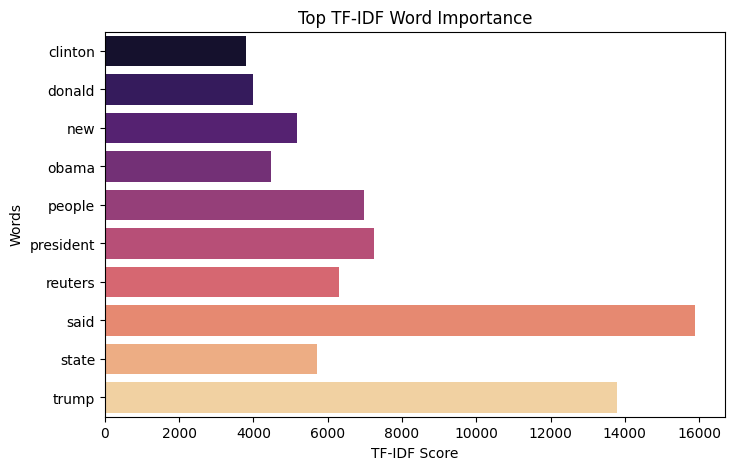

In [ ]:
text_data = df_merge["text"].fillna("")  #fill nan values if any

#TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = vectorizer.fit_transform(text_data)
tfidf_words = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

#TF-IDF word importance Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=tfidf_scores, y=tfidf_words, palette="magma")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top TF-IDF Word Importance")
plt.show()


In [ ]:
LR = LogisticRegression(class_weight="balanced", max_iter=1000)
LR.fit(x_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#new
calibrated_LR = CalibratedClassifierCV(LR, method="sigmoid")
calibrated_LR.fit(x_train_vec, y_train)

CalibratedClassifierCV(estimator=LogisticRegression(class_weight='balanced',
                                                    max_iter=1000))

In [ ]:
pred_lr = calibrated_LR.predict(xv_test)

In [ ]:
calibrated_score = calibrated_LR.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5785
           1       0.99      0.99      0.99      5436

    accuracy                           0.99     11221
   macro avg       0.99      0.99      0.99     11221
weighted avg       0.99      0.99      0.99     11221



In [ ]:
DT = DecisionTreeClassifier(
    max_depth=10,  # Limit tree depth
    min_samples_split=5,  # Require at least 5 samples per split
    class_weight="balanced",  # Adjust weights for Fake/Real
    random_state=42
)

DT.fit(xv_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [ ]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9951875946885305

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5785
           1       1.00      1.00      1.00      5436

    accuracy                           1.00     11221
   macro avg       1.00      1.00      1.00     11221
weighted avg       1.00      1.00      1.00     11221



In [ ]:
GBC = GradientBoostingClassifier(
    n_estimators=20,       # More trees for stability
    learning_rate=0.2,     # Lower learning rate for better generalization
    max_depth=3,
    min_samples_split=5, # Limit tree depth to avoid overfitting
    subsample=0.8,          # Randomly use 80% of data per tree
    random_state=42
)

GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=5,
                           n_estimators=20, random_state=42, subsample=0.8)

In [ ]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.9947420016041351

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5785
           1       0.99      1.00      0.99      5436

    accuracy                           0.99     11221
   macro avg       0.99      0.99      0.99     11221
weighted avg       0.99      0.99      0.99     11221



In [ ]:
RFC = RandomForestClassifier(
    n_estimators=100,       # More trees for better generalization
    max_depth=5,           # Limit tree depth to avoid overfitting
    min_samples_split=5,
    class_weight="balanced",
    random_state=42
)

RFC.fit(xv_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, random_state=42)

In [ ]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9525888958203369

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5785
           1       0.93      0.97      0.95      5436

    accuracy                           0.95     11221
   macro avg       0.95      0.95      0.95     11221
weighted avg       0.95      0.95      0.95     11221



In [ ]:
# using Stratified K-Fold to maintain Fake/Real distribution
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
# Cross-Validation for Logistic Regression
lr_scores = cross_val_score(LR, x_train_vec, y_train, cv=cv, scoring="accuracy")
print("Logistic Regression Cross-Validation Accuracy:", lr_scores.mean())

Logistic Regression Cross-Validation Accuracy: 0.9812251203137068


In [ ]:
# Cross-Validation for Random Forest
rfc_scores = cross_val_score(RFC, x_train_vec, y_train, cv=cv, scoring="accuracy")
print("Random Forest Cross-Validation Accuracy:", rfc_scores.mean())

Random Forest Cross-Validation Accuracy: 0.9182163864298021


In [ ]:
# Cross-Validation for Gradient Boosting
gbc_scores = cross_val_score(GBC, x_train_vec, y_train, cv=cv, scoring="accuracy")
print("Gradient Boosting Cross-Validation Accuracy:", gbc_scores.mean())

Gradient Boosting Cross-Validation Accuracy: 0.9939694611134217


In [ ]:
# Cross-Validation for Decision Tree
dt_scores = cross_val_score(DT, x_train_vec, y_train, cv=cv, scoring="accuracy")
print("Decision Tree Cross-Validation Accuracy:", dt_scores.mean())

Decision Tree Cross-Validation Accuracy: 0.9945041886994237


In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

<ipython-input-51-b4c589de6761>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


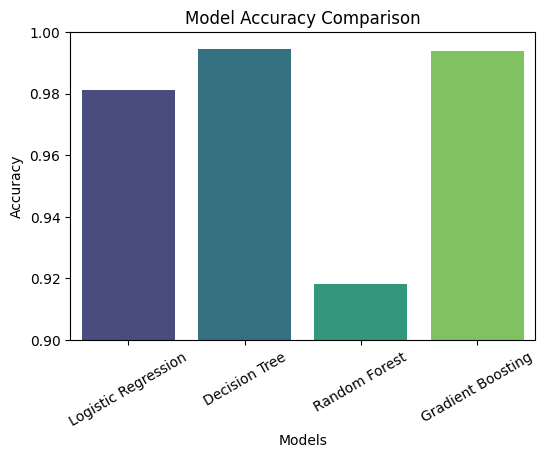

In [ ]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
accuracies = [0.9812251203137068, 0.9945041886994237, 0.9182163864298021, 0.9939694611134217]  # Accuracy values from your previous runs

# creating a bar plot for model accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="viridis")

plt.ylim(0.90, 1.0)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

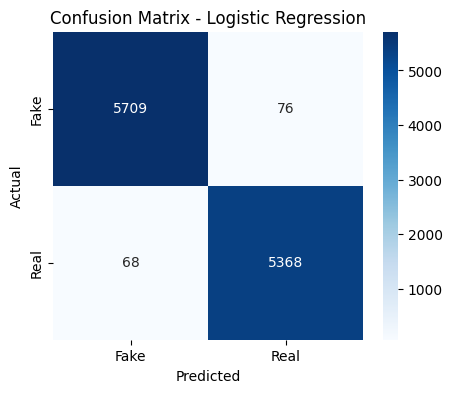

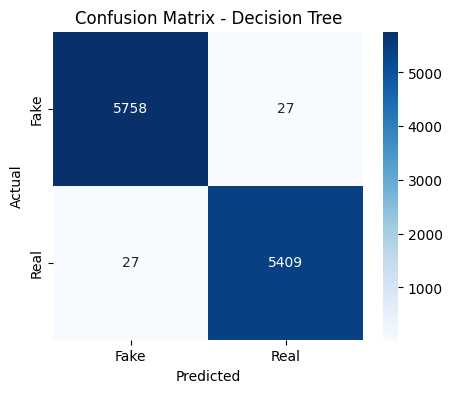

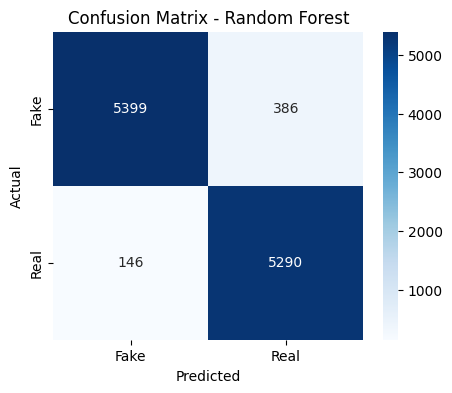

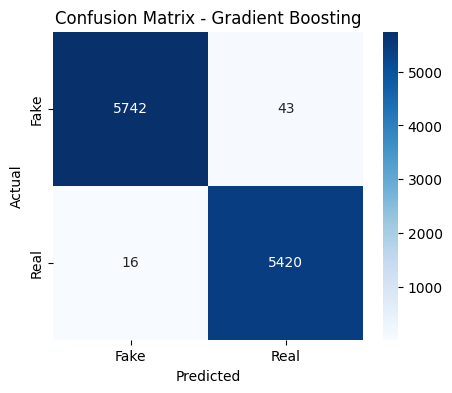

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

models_preds = [
    ("Logistic Regression", pred_lr),
    ("Decision Tree", pred_dt),
    ("Random Forest", pred_rfc),
    ("Gradient Boosting", pred_gbc)
]

# plotting confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# generating and plotting confusion matrices
for model_name, preds in models_preds:
    cm = confusion_matrix(y_test, preds)
    plot_confusion_matrix(cm, f"Confusion Matrix - {model_name}")


In [ ]:
import openai
import pandas as pd

# Create OpenAI client (new API)
client = openai.OpenAI(api_key = "openAI API Key"

# listing of topics for fake news generation
topics = [
    "New breakthrough in AI replaces human jobs",
    "Scientists discover a way to time travel",
    "UFO sighting confirmed by government",
    "New law to ban social media after 10 PM",
    "Celebrity secretly runs underground tech empire"
]

fake_news_data = []

for topic in topics:
    prompt = f"Write a fake news article about: {topic}"

    response = client.chat.completions.create(  # New API syntax
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}]
    )

    article = response.choices[0].message.content

    fake_news_data.append({
        "title": topic,
        "content": article,
        "label": "fake"
    })

fake_news_df = pd.DataFrame(fake_news_data)
fake_news_df.to_csv("fake_news_dataset.csv", index=False)

Fake news dataset created successfully!


In [ ]:
from google.colab import files
files.download("fake_news_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install newsapi-python

In [ ]:
from newsapi import NewsApiClient

# Initialize NewsAPI with your API Key
newsapi = NewsApiClient(api_key="7f371e0a6b0246d48bd5942db7e4e7aa")  # Replace with your NewsAPI key

# getting recent real news articles
real_articles = newsapi.get_top_headlines(language="en", page_size=50)

# processing and structure data
real_news_data = []
for article in real_articles["articles"]:
    if article["title"] and article["content"]:
        real_news_data.append({
            "title": article["title"],
            "content": article["content"],
            "label": "real"
        })

real_news_df = pd.DataFrame(real_news_data)
real_news_path = "/content/Real_News_Dataset.csv"
real_news_df.to_csv(real_news_path, index=False)

In [ ]:
from google.colab import files
files.download("Real_News_Dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>